In [1]:
import pandas as pd
import numpy as np

### Data overview

In [2]:
movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
tags = pd.read_csv('tags.csv',sep=',',parse_dates=['timestamp'])
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
del ratings['timestamp']
del tags['timestamp']

In [6]:
movies=movies.dropna()
tags=tags.dropna()
ratings=ratings.dropna()

In [7]:
#filters for action movies
is_action= movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
38,42,Dead Presidents (1995),Action|Crime|Drama
40,44,Mortal Kombat (1995),Action|Adventure|Fantasy
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
62,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
63,71,Fair Game (1995),Action
68,76,Screamers (1995),Action|Sci-Fi|Thriller
70,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
77,86,White Squall (1996),Action|Adventure|Drama
80,89,Nick of Time (1995),Action|Thriller


In [8]:
#counts movies for different rating
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


### General movie recommendation

In [36]:
# merge tags on corresponding movies
mwt = movies.merge(tags, on='movieId', how='inner')
mwt.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game


In [11]:
#average rating for each movie
avg_ratings= ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [12]:
#combine avg rating with movie info
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
9721,193585,Flint (2017),Drama,3.5
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [13]:
#Adventure movie avg rating
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
7,8,Tom and Huck (1995),Adventure|Children,2.875000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212
12,13,Balto (1995),Adventure|Animation|Children,3.125000


In [14]:
#Highrating movie filter
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


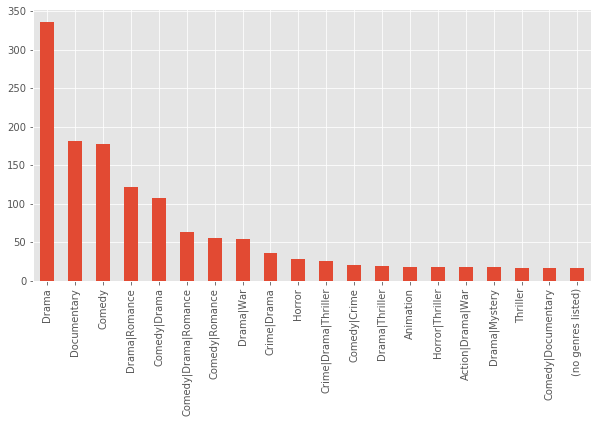

In [17]:
#Show numbers of highrating movies in each genre
highly_rated = box_office[is_highly_rated]
highrate_genre = highly_rated['genres'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
highrate_genre[:20].plot(kind='bar', figsize=(10,5))

### Combination of ratings and tags by users

In [9]:
rwt = ratings.merge(tags)
rwt.head(10)

,userId,movieId,rating,tag
0,2,60756,5.0,funny
1,2,60756,5.0,Highly quotable
2,2,60756,5.0,will ferrell
3,2,89774,5.0,Boxing story
4,2,89774,5.0,MMA
5,2,89774,5.0,Tom Hardy
6,2,106782,5.0,drugs
7,2,106782,5.0,Leonardo DiCaprio
8,2,106782,5.0,Martin Scorsese
9,7,48516,1.0,way too long


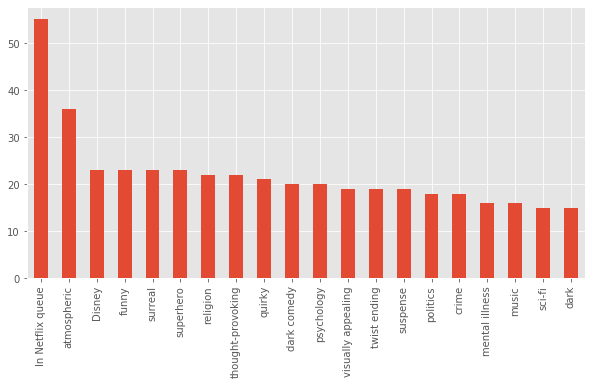

In [159]:
#Show top 20 most frequently-used tags 
tagnum = rwt['tag'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
tagnum[:20].plot(kind='bar', figsize=(10,5))

## Clustering high-rating movies by tags and genres

### Extract release year and genre info

In [80]:
moviesum = pd.DataFrame()
moviesum = box_office.copy()

#extrat release year as another cluster feature
moviesum['year'] = mwt.title.str.extract("\((\d{4})\)")
moviesum.title = movies.title.str[:-6]
moviesum.head()

,movieId,title,genres,rating,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji,Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men,Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II,Comedy,3.071429,1995


In [81]:
#transfer genres into indicative variables
genres_summary = pd.DataFrame(moviesum.genres.str.split('|').tolist()).stack().unique()
genres_summary = pd.DataFrame(genres_summary, columns=['genre']) 

moviegenre = moviesum.join(moviesum.genres.str.get_dummies().astype(bool))
moviegenre.drop('genres', inplace=True, axis=1)
genre_indi = moviesum.genres.str.get_dummies()
moviesum = moviesum.join(genre_indi)
moviesum.drop('genres', inplace=True, axis=1)
moviesum.head()

,movieId,title,rating,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,3.920930,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,3.431818,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,3.259615,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,2.357143,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,3.071429,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
data_m1 = pd.DataFrame()
data_m1 = moviesum.copy()

del data_m1['title']
del data_m1['year']
del data_m1['rating']
del data_m1['movieId']
data_m1.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### K-means Cluster

In [149]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch

In [150]:
d = pd.DataFrame()
d = data_m1.copy()

In [77]:
len(genres_summary)
# Taking number of genres as number of clusters

20

In [157]:
mod = KMeans(n_clusters=20)
mod.fit_predict(d)#y_pred表示聚类的结果
 
#Counts for each cluster's size
r1 = pd.Series(mod.labels_).value_counts()

#Calculate center for each cluster
r2 = pd.DataFrame(mod.cluster_centers_)
r = pd.concat([r2, r1], axis = 1)
r.columns = list(d.columns) + [u'Total in cluster']
print(r)
 
#label cluster index on each movie data
r = pd.concat([d, pd.Series(mod.labels_, index = d.index)], axis = 1)
r.columns = list(d.columns) + [u'cluster Index']
print(r.head())


    (no genres listed)        Action  Adventure     Animation      Children  \
0        -2.558717e-17  6.006006e-03   0.012012  9.009009e-03  6.006006e-03   
1         1.052632e-01  3.095975e-02   0.000000  1.238390e-02  5.551115e-16   
2         1.079865e-16  4.015402e-02   0.046205  1.265127e-02  2.255226e-02   
3        -2.645453e-17  8.357349e-02   0.922190  3.141210e-01  6.685879e-01   
4        -3.165870e-17  1.000000e+00   0.046358  1.986755e-02  2.207506e-03   
5        -3.165870e-17  1.193059e-01   0.004338  4.338395e-03  6.522560e-16   
6        -2.775558e-17  1.000000e+00   0.122995  5.614973e-02  2.406417e-02   
7         9.280771e-17 -2.331468e-15   0.000000  2.777778e-02  5.826558e-02   
8        -1.431147e-17  7.432432e-01   0.873874  1.621622e-01  9.009009e-02   
9        -2.298509e-17  6.106227e-16   0.016779 -1.249001e-16  5.273559e-16   
10       -2.471981e-17 -2.275957e-15   0.023295  1.331115e-02  2.828619e-02   
11       -1.301043e-17  8.472222e-01   1.000000  9.7

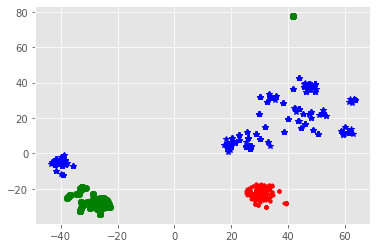

In [158]:
#Visualization for first 3 clusters
from sklearn.manifold import TSNE
 
ts = TSNE()
ts.fit_transform(r)
ts = pd.DataFrame(ts.embedding_, index = r.index)
 
import matplotlib.pyplot as plt
 
a = ts[r[u'cluster Index'] == 0]
plt.plot(a[0], a[1], 'r.')
a = ts[r[u'cluster Index'] == 1]
plt.plot(a[0], a[1], 'go')
a = ts[r[u'cluster Index'] == 2]
plt.plot(a[0], a[1], 'b*')

plt.show()

### KNN(K-nearest neighbors) Clustering

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# selet 10 nearest points: recommend 10 movies
knncluster = KNeighborsClassifier(n_neighbors=10)

In [102]:
moviedata = data_m1.values
movieidn = data_m1.index.values

cluster.fit(moviedata, movieidn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [103]:
#Give recommendation for movie Titanic(1998)
titanic = moviesum['title'].str.contains('Titanic')
moviesum[titanic]

,movieId,title,rating,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1291,1722,Titanic,3.066667,1998,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,3406,Raise the Titanic,3.000000,2004,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2543,3408,Titanic,3.528571,1947,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3553,4873,Titanica,3.684211,2016,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
given = [data_m1.loc[1291].values]
given

[array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       dtype=int64)]

In [144]:
titanic_recommend = cluster.kneighbors(X=given, n_neighbors=10, return_distance=False)

recommendlist = []
for each in titanic_recommend:
    recommendlist.append(data_m1.iloc[each].index)

print(recommendlist)

[Int64Index([4090, 2325, 1777, 1052, 431, 2986, 84, 2968, 754, 1210], dtype='int64')]


In [145]:
recommend=[4090, 2325, 1777, 1052, 431, 2986, 84, 2968, 754, 1210]

In [148]:
movielist= moviesum.loc[recommend]

print("Relative recommendations for Titanic(1998): ")
print(movielist.title)


Relative recommendations for Titanic(1998): 
4090                  Ragtime 
2325           Mansfield Park 
1777           Money Pit, The 
1052           101 Dalmatians 
431        Executive Decision 
2986           Vertical Limit 
84               Broken Arrow 
2968             Little Nicky 
754              Maximum Risk 
1210    187 (One Eight Seven) 
Name: title, dtype: object


In [ ]:
### Clustering movies based on users preferrence by their rating pattern